<a href="https://colab.research.google.com/github/josephgonz12/Wine_Classifier/blob/main/Wine_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import kagglehub

# Download latest version-
path = kagglehub.dataset_download("ehsanesmaeili/red-and-white-wine-qualitymerged")

print("Path to dataset files:", path)

KaggleApiHTTPError: 403 Client Error.

You don't have permission to access resource at URL: https://www.kaggle.com/datasets/ehsanesmaeili/red-and-white-wine-qualitymerged. The server reported the following issues: Permission 'datasets.get' was denied
Please make sure you are authenticated if you are trying to access a private resource or a resource requiring consent.

In [55]:
import matplotlib.pyplot as plt

df = pd.read_csv(path + "/wine_quality_merged.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [57]:
from re import X
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.metrics import accuracy_score
import seaborn as sns


df['type'] = df['type'].map({'red':0, 'white':1})
cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
X = df[cols]
y = df["type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Processed Shape: ", X_train.shape)
print(f"Unique label values: {np.unique(y_train)}")

Processed Shape:  (5197, 12)
Unique label values: [0 1]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


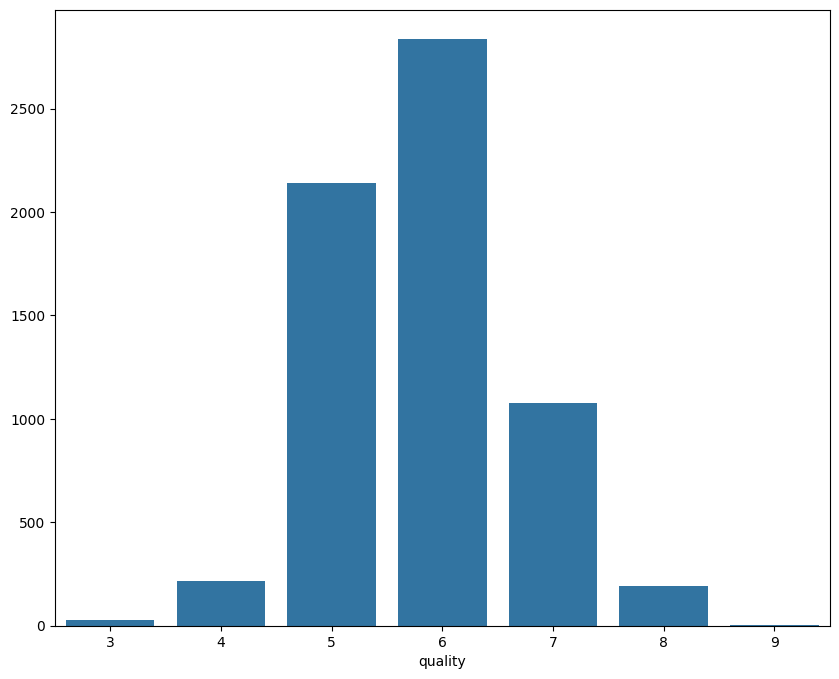

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x = df['quality'].value_counts().index,
           y = df['quality'].value_counts().values)
plt.show()

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled shape: ", X_train_scaled.shape)
X_train_scaled.view()

Scaled shape:  (5197, 12)


array([[-0.46822898, -0.59951186,  0.20546655, ..., -1.0832659 ,
         0.01376574, -0.92920628],
       [ 0.85149992, -0.35284877,  1.10406349, ...,  0.59857677,
         1.60871671,  1.35243087],
       [ 0.38571325,  2.32961232, -2.14471006, ...,  0.26220824,
         1.10504798,  0.2116123 ],
       ...,
       [-0.62349121,  0.20214318, -0.83137607, ..., -0.67962366,
        -0.82568214, -0.92920628],
       [-0.54586009, -0.47618032,  1.24230917, ..., -0.41052883,
        -0.82568214, -0.92920628],
       [-0.00244231,  1.74378748, -1.79909585, ...,  0.06038712,
        -0.82568214, -0.92920628]])

Using tensorflow neural networks to train a classifier

In [ ]:
!pip install tensorflow

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2793 - loss: 0.7495 - val_accuracy: 0.3952 - val_loss: 0.7028
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4804 - loss: 0.6754 - val_accuracy: 0.6663 - val_loss: 0.6362
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7542 - loss: 0.6108 - val_accuracy: 0.8644 - val_loss: 0.5747
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8961 - loss: 0.5541 - val_accuracy: 0.9519 - val_loss: 0.5171
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9584 - loss: 0.4979 - val_accuracy: 0.9731 - val_loss: 0.4626
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9688 - loss: 0.4467 - val_accuracy: 0.9779 - val_loss: 0.4110
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9849 - loss: 0.3905 - val_accuracy: 0.9846 - val_loss: 0.3624
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9841 - loss: 0.3523 - val_accuracy: 0.9875 - 

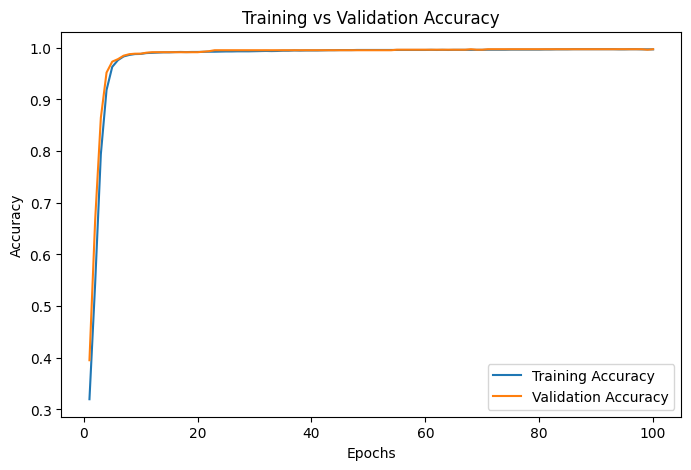

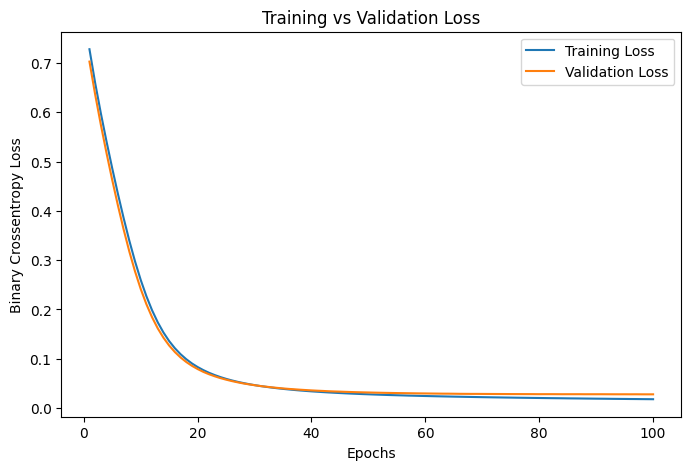

In [61]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=100,batch_size=128, validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)], verbose=1)

acc      = history.history["accuracy"]
val_acc  = history.history["val_accuracy"]
loss     = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(1, len(acc) + 1)


plt.figure(figsize=(8, 5))
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# --- Loss plot (optional) ---
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [62]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9941 - loss: 0.0271
Test accuracy: 0.9930769205093384
